# Proyecto No.2 Data Science

Este notebook realiza el preprocesamiento y análisis exploratorio (EDA) de los datos del Mitsui & Co. Commodity Prediction Challenge. Se revisan las series de precios de commodities e índices (train.csv), limpiando valores faltantes, transformando datos y explorando distribuciones, volatilidad y correlaciones. El fin es comprender la estructura de los datos y preparar la información antes de aplicar modelos predictivos.

# Serie de precios de los activos 
## Carga y preprocesamiento de datos

En los siguientes bloques de cóodigo se quitaron los duplicados
Posteriormente se llenaron los datos nulos con el promedio de cada columna
Es decir, si hay un dato faltante para la columna del precio de Oro en JPX
Se obtuvo su promedio con los datos que habían en la columna y luego este valor se coloco en las celdas faltantes. 
Posteriormente se eliminaron columnas redundantes, se considero alta correlacion si entre las columnas había una correlacion arrba de 0.85
Finalmente se obtuvo el conjunto listo para el análisis exploratorio que se ha llamado data
Este ultimo conjunto de datos se usará para el modelado de la serie temporal

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
import pandas as pd
import numpy as np

In [1]:
import pandas as pd   # Librería para manejar tablas (DataFrames)
df = pd.read_csv("train.csv") # Datos crudos: series de precios de los activos (una columna por activo).
df

,date_id,LME_AH_Close,LME_CA_Close,LME_PB_Close,LME_ZS_Close,JPX_Gold_Mini_Futures_Open,JPX_Gold_Rolling-Spot_Futures_Open,JPX_Gold_Standard_Futures_Open,JPX_Platinum_Mini_Futures_Open,JPX_Platinum_Standard_Futures_Open,...,FX_GBPCAD,FX_CADCHF,FX_NZDCAD,FX_NZDCHF,FX_ZAREUR,FX_NOKGBP,FX_NOKCHF,FX_ZARCHF,FX_NOKJPY,FX_ZARGBP
0,0,2264.5,7205.0,2570.0,3349.0,NaN,NaN,NaN,NaN,NaN,...,1.699987,0.776874,0.888115,0.689954,0.066653,0.090582,0.119630,0.078135,13.822740,0.059163
1,1,2228.0,7147.0,2579.0,3327.0,NaN,NaN,NaN,NaN,NaN,...,1.695279,0.778682,0.889488,0.692628,0.067354,0.091297,0.120520,0.079066,13.888146,0.059895
2,2,2250.0,7188.5,2587.0,3362.0,4684.0,4691.0,4684.0,3363.0,3367.0,...,1.692724,0.780186,0.894004,0.697490,0.067394,0.091478,0.120809,0.079287,13.983675,0.060037
3,3,2202.5,7121.0,2540.0,3354.0,4728.0,4737.0,4729.0,3430.0,3426.0,...,1.683111,0.785329,0.889439,0.698502,0.067639,0.091558,0.121021,0.079285,14.035571,0.059983
4,4,2175.0,7125.0,2604.0,3386.0,NaN,NaN,NaN,NaN,NaN,...,1.684816,0.787264,0.891042,0.701485,0.067443,0.091266,0.121055,0.078925,14.013760,0.059503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,1956,2629.5,9778.5,2010.0,2818.5,16041.0,16183.0,16046.0,6076.0,6073.0,...,1.842075,0.584336,0.819066,0.478610,0.048581,0.073181,0.078771,0.045312,14.606239,0.042097
1957,1957,2646.5,9860.0,2014.5,2838.5,NaN,NaN,NaN,NaN,NaN,...,1.844791,0.583610,0.816264,0.476380,0.048547,0.072941,0.078532,0.045315,14.502889,0.042089
1958,1958,2658.5,9919.5,2011.0,2860.0,16132.5,16261.0,16134.0,6200.0,6200.0,...,1.839538,0.583402,0.816093,0.476110,0.048495,0.073421,0.078794,0.045184,14.580416,0.042103
1959,1959,2651.0,9930.5,2032.0,2862.0,16214.5,16341.0,16211.0,6175.0,6195.0,...,1.847106,0.582341,0.822465,0.478955,0.048457,0.072909,0.078424,0.045193,14.492839,0.042015


In [2]:
print("Tipos de datos en el dataset")
df.dtypes

Tipos de datos en el dataset


date_id           int64
LME_AH_Close    float64
LME_CA_Close    float64
LME_PB_Close    float64
LME_ZS_Close    float64
                 ...   
FX_NOKGBP       float64
FX_NOKCHF       float64
FX_ZARCHF       float64
FX_NOKJPY       float64
FX_ZARGBP       float64
Length: 558, dtype: object

In [3]:
df.isna().sum()

date_id          0
LME_AH_Close    51
LME_CA_Close    51
LME_PB_Close    51
LME_ZS_Close    51
                ..
FX_NOKGBP        0
FX_NOKCHF        0
FX_ZARCHF        0
FX_NOKJPY        0
FX_ZARGBP        0
Length: 558, dtype: int64

In [4]:
"""
Se decide llenar el data set con la media de cada columna ya que al retirar los datos faltantes
el dataset se reduce a casi 250 observaciones, lo cual es una pérdida significativa que impactaría en el modelado posterior
"""
df_filled = df.copy()
df_filled = df_filled.fillna(df.mean(numeric_only=True))
print(df_filled.isna().sum())
df_filled

date_id         0
LME_AH_Close    0
LME_CA_Close    0
LME_PB_Close    0
LME_ZS_Close    0
               ..
FX_NOKGBP       0
FX_NOKCHF       0
FX_ZARCHF       0
FX_NOKJPY       0
FX_ZARGBP       0
Length: 558, dtype: int64


,date_id,LME_AH_Close,LME_CA_Close,LME_PB_Close,LME_ZS_Close,JPX_Gold_Mini_Futures_Open,JPX_Gold_Rolling-Spot_Futures_Open,JPX_Gold_Standard_Futures_Open,JPX_Platinum_Mini_Futures_Open,JPX_Platinum_Standard_Futures_Open,...,FX_GBPCAD,FX_CADCHF,FX_NZDCAD,FX_NZDCHF,FX_ZAREUR,FX_NOKGBP,FX_NOKCHF,FX_ZARCHF,FX_NOKJPY,FX_ZARGBP
0,0,2264.5,7205.0,2570.0,3349.0,7693.877507,7758.334417,7694.050407,3792.407046,3793.64607,...,1.699987,0.776874,0.888115,0.689954,0.066653,0.090582,0.119630,0.078135,13.822740,0.059163
1,1,2228.0,7147.0,2579.0,3327.0,7693.877507,7758.334417,7694.050407,3792.407046,3793.64607,...,1.695279,0.778682,0.889488,0.692628,0.067354,0.091297,0.120520,0.079066,13.888146,0.059895
2,2,2250.0,7188.5,2587.0,3362.0,4684.000000,4691.000000,4684.000000,3363.000000,3367.00000,...,1.692724,0.780186,0.894004,0.697490,0.067394,0.091478,0.120809,0.079287,13.983675,0.060037
3,3,2202.5,7121.0,2540.0,3354.0,4728.000000,4737.000000,4729.000000,3430.000000,3426.00000,...,1.683111,0.785329,0.889439,0.698502,0.067639,0.091558,0.121021,0.079285,14.035571,0.059983
4,4,2175.0,7125.0,2604.0,3386.0,7693.877507,7758.334417,7694.050407,3792.407046,3793.64607,...,1.684816,0.787264,0.891042,0.701485,0.067443,0.091266,0.121055,0.078925,14.013760,0.059503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,1956,2629.5,9778.5,2010.0,2818.5,16041.000000,16183.000000,16046.000000,6076.000000,6073.00000,...,1.842075,0.584336,0.819066,0.478610,0.048581,0.073181,0.078771,0.045312,14.606239,0.042097
1957,1957,2646.5,9860.0,2014.5,2838.5,7693.877507,7758.334417,7694.050407,3792.407046,3793.64607,...,1.844791,0.583610,0.816264,0.476380,0.048547,0.072941,0.078532,0.045315,14.502889,0.042089
1958,1958,2658.5,9919.5,2011.0,2860.0,16132.500000,16261.000000,16134.000000,6200.000000,6200.00000,...,1.839538,0.583402,0.816093,0.476110,0.048495,0.073421,0.078794,0.045184,14.580416,0.042103
1959,1959,2651.0,9930.5,2032.0,2862.0,16214.500000,16341.000000,16211.000000,6175.000000,6195.00000,...,1.847106,0.582341,0.822465,0.478955,0.048457,0.072909,0.078424,0.045193,14.492839,0.042015


In [5]:
print("Cantidad duplicados")
print("Duplicados eliminados:", df_filled.duplicated().sum())

Cantidad duplicados
Duplicados eliminados: 0


In [6]:
"""
Ahora que ya tenemos un dataset limpio (sin nulos ni duplicados),
el siguiente paso es reducir la dimensionalidad eliminando variables redundantes.
Para ello calculamos la matriz de correlación absoluta entre todas las variables
y buscamos aquellas que tengan correlación superior a 0.8, ya que se consideran
altamente correlacionadas y por lo tanto aportan información muy similar.
Finalmente, eliminamos estas columnas redundantes de df_filled,
obteniendo un nuevo dataframe (df_reduced) más compacto, eficiente y con menor
riesgo de multicolinealidad, lo que facilitará tanto el análisis exploratorio
como la posterior construcción de modelos predictivos.
"""

# Se trabaja con df_filled ya que es el dataframe sin nulos ni duplicados
import numpy as np

corr_matrix = df_filled.corr().abs()
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)
cols_to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
df_reduced = df_filled.drop(cols_to_drop, axis=1)
data = df_reduced.copy()
data

,date_id,LME_AH_Close,LME_PB_Close,JPX_Gold_Mini_Futures_Volume,JPX_Gold_Rolling-Spot_Futures_Volume,JPX_Gold_Standard_Futures_Volume,JPX_Platinum_Mini_Futures_Volume,JPX_Platinum_Standard_Futures_Volume,JPX_RSS3_Rubber_Futures_Volume,JPX_Gold_Mini_Futures_open_interest,...,US_Stock_XLE_adj_volume,US_Stock_YINN_adj_volume,FX_AUDUSD,FX_EURAUD,FX_EURGBP,FX_EURUSD,FX_ZARJPY,FX_AUDNZD,FX_EURCAD,FX_GBPCAD
0,0,2264.5,2570.0,5721.83794,6663.717615,27899.320325,975.99458,8623.97832,1965.642818,3786.026558,...,14891354.0,51983.65,0.783393,1.540368,0.887622,1.206713,9.028141,1.103011,1.508946,1.699987
1,1,2228.0,2579.0,5721.83794,6663.717615,27899.320325,975.99458,8623.97832,1965.642818,3786.026558,...,19299630.0,39273.00,0.782779,1.534906,0.889248,1.201492,9.111194,1.104186,1.507524,1.695279
2,2,2250.0,2587.0,2681.00000,37908.000000,30656.000000,624.00000,13713.00000,4128.000000,1768.000000,...,14306843.0,43778.95,0.786472,1.535084,0.890830,1.207300,9.177484,1.098776,1.507930,1.692724
3,3,2202.5,2540.0,3523.00000,30791.000000,35267.000000,525.00000,17629.00000,4586.000000,2026.000000,...,14204426.0,25862.25,0.787461,1.527972,0.886809,1.203219,9.195264,1.098275,1.492598,1.683111
4,4,2175.0,2604.0,5721.83794,6663.717615,27899.320325,975.99458,8623.97832,1965.642818,3786.026558,...,9779217.0,29807.00,0.784808,1.525623,0.882271,1.197322,9.136605,1.093475,1.486463,1.684816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,1956,2629.5,2010.0,5968.00000,1307.000000,21614.000000,642.00000,8170.00000,255.000000,3341.000000,...,30487841.0,4216268.00,0.650701,1.786168,0.866519,1.162261,8.402088,1.091048,1.596192,1.842075
1957,1957,2646.5,2014.5,5721.83794,6663.717615,27899.320325,975.99458,8623.97832,1965.642818,3786.026558,...,15217229.0,3530073.00,0.652761,1.791509,0.866967,1.169427,8.368510,1.093704,1.599372,1.844791
1958,1958,2658.5,2011.0,11875.00000,1767.000000,33544.000000,2241.00000,6897.00000,323.000000,3393.000000,...,16222037.0,3590868.00,0.655415,1.791038,0.868180,1.173874,8.361028,1.092632,1.597050,1.839538
1959,1959,2651.0,2032.0,10931.00000,1759.000000,32592.000000,643.00000,9512.00000,335.000000,3497.000000,...,14023041.0,3569772.00,0.660200,1.783354,0.867045,1.177370,8.351652,1.091889,1.601524,1.847106


In [8]:
df_reduced.to_csv("train_reduced.csv", index=False)

In [ ]:
import numpy as np
import pandas as pd

THRESHOLD = 0.8  

# Usar solo columnas numéricas
num_cols = df_filled.select_dtypes(include="number")

# Matriz de correlación absoluta
corr_matrix = num_cols.corr().abs()

# Triángulo superior (para no repetir pares)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

#PARES con correlación > THRESHOLD
#    - 'keep_col' = columna "anterior" (se mantiene)
#    - 'drop_col' = columna "posterior" (se elimina)
pairs_df = (
    upper.where(upper > THRESHOLD)
         .stack()
         .reset_index()
         .rename(columns={"level_0": "keep_col", "level_1": "drop_col", 0: "corr"})
         .sort_values("corr", ascending=False)
         .reset_index(drop=True)
)

# Columnas a eliminar (las "posteriores" que están muy correlacionadas con alguna anterior)
cols_to_drop = pairs_df["drop_col"].unique().tolist()

# DataFrame reducido (sin las columnas redundantes)
df_reduced = df_filled.drop(columns=cols_to_drop, errors="ignore")

print(f"Umbral de correlación: > {THRESHOLD}")
print(f"Columnas numéricas totales: {num_cols.shape[1]}")
print(f"Columnas a eliminar por alta correlación: {len(cols_to_drop)}")
print(f"Columnas restantes en df_reduced: {df_reduced.select_dtypes(include='number').shape[1]}")

print("\nEjemplos de pares con alta correlación (keep_col vs drop_col):")
display(pairs_df.head(20))


Umbral de correlación: > 0.8
Columnas numéricas totales: 558
Columnas a eliminar por alta correlación: 429
Columnas restantes en df_reduced: 129

Ejemplos de pares con alta correlación (keep_col vs drop_col):


,keep_col,drop_col,corr
0,JPX_RSS3_Rubber_Futures_Close,JPX_RSS3_Rubber_Futures_settlement_price,1.000000
1,JPX_Gold_Standard_Futures_Close,JPX_Gold_Mini_Futures_settlement_price,1.000000
2,JPX_Gold_Mini_Futures_High,JPX_Gold_Standard_Futures_High,1.000000
3,JPX_Gold_Mini_Futures_Low,JPX_Gold_Standard_Futures_Low,1.000000
4,JPX_Gold_Mini_Futures_Close,JPX_Gold_Mini_Futures_settlement_price,0.999999
5,JPX_Gold_Mini_Futures_Close,JPX_Gold_Standard_Futures_Close,0.999999
6,JPX_Gold_Mini_Futures_Open,JPX_Gold_Standard_Futures_Open,0.999999
7,JPX_Platinum_Standard_Futures_Close,JPX_Platinum_Mini_Futures_settlement_price,0.999999
8,US_Stock_SPTL_adj_high,US_Stock_VGLT_adj_high,0.999991
9,US_Stock_SPTL_adj_close,US_Stock_VGLT_adj_close,0.999991


# Inicio Análisis Exploratorio 

In [17]:
print("Dimensiones del dataset:", df_reduced.shape)
print("\nTipos de datos:")
print(df_reduced.dtypes.value_counts())

print("\nValores nulos (%):")
print((df_reduced.isnull().mean() * 100).round(2).sort_values(ascending=False).head(10))

display(df_reduced.head())


Dimensiones del dataset: (1961, 129)

Tipos de datos:
float64    128
int64        1
Name: count, dtype: int64

Valores nulos (%):
date_id                                 0.0
LME_AH_Close                            0.0
LME_PB_Close                            0.0
JPX_Gold_Mini_Futures_Volume            0.0
JPX_Gold_Rolling-Spot_Futures_Volume    0.0
JPX_Gold_Standard_Futures_Volume        0.0
JPX_Platinum_Mini_Futures_Volume        0.0
JPX_Platinum_Standard_Futures_Volume    0.0
JPX_RSS3_Rubber_Futures_Volume          0.0
JPX_Gold_Mini_Futures_open_interest     0.0
dtype: float64


,date_id,LME_AH_Close,LME_PB_Close,JPX_Gold_Mini_Futures_Volume,JPX_Gold_Rolling-Spot_Futures_Volume,JPX_Gold_Standard_Futures_Volume,JPX_Platinum_Mini_Futures_Volume,JPX_Platinum_Standard_Futures_Volume,JPX_RSS3_Rubber_Futures_Volume,JPX_Gold_Mini_Futures_open_interest,...,US_Stock_XLE_adj_volume,US_Stock_YINN_adj_volume,FX_AUDUSD,FX_EURAUD,FX_EURGBP,FX_EURUSD,FX_ZARJPY,FX_AUDNZD,FX_EURCAD,FX_GBPCAD
0,0,2264.5,2570.0,5721.83794,6663.717615,27899.320325,975.99458,8623.97832,1965.642818,3786.026558,...,14891354.0,51983.65,0.783393,1.540368,0.887622,1.206713,9.028141,1.103011,1.508946,1.699987
1,1,2228.0,2579.0,5721.83794,6663.717615,27899.320325,975.99458,8623.97832,1965.642818,3786.026558,...,19299630.0,39273.00,0.782779,1.534906,0.889248,1.201492,9.111194,1.104186,1.507524,1.695279
2,2,2250.0,2587.0,2681.00000,37908.000000,30656.000000,624.00000,13713.00000,4128.000000,1768.000000,...,14306843.0,43778.95,0.786472,1.535084,0.890830,1.207300,9.177484,1.098776,1.507930,1.692724
3,3,2202.5,2540.0,3523.00000,30791.000000,35267.000000,525.00000,17629.00000,4586.000000,2026.000000,...,14204426.0,25862.25,0.787461,1.527972,0.886809,1.203219,9.195264,1.098275,1.492598,1.683111
4,4,2175.0,2604.0,5721.83794,6663.717615,27899.320325,975.99458,8623.97832,1965.642818,3786.026558,...,9779217.0,29807.00,0.784808,1.525623,0.882271,1.197322,9.136605,1.093475,1.486463,1.684816


Análisis Univariado

In [25]:
desc = df_reduced.describe().T
display(desc)

,count,mean,std,min,25%,50%,75%,max
date_id,1961.0,980.000000,566.236258,0.000000,490.000000,980.000000,1470.000000,1960.000000
LME_AH_Close,1961.0,2252.202853,393.325244,1462.000000,1938.000000,2252.202853,2501.500000,3849.000000
LME_PB_Close,1961.0,2085.848576,180.755967,1585.500000,1976.000000,2076.000000,2183.000000,2681.000000
JPX_Gold_Mini_Futures_Volume,1961.0,5721.837940,4043.170298,863.000000,3183.000000,5022.000000,6961.000000,45748.000000
JPX_Gold_Rolling-Spot_Futures_Volume,1961.0,6663.717615,5728.030095,461.000000,3153.000000,5229.000000,7794.000000,66742.000000
...,...,...,...,...,...,...,...,...
FX_EURUSD,1961.0,1.119408,0.056739,0.959582,1.082211,1.114293,1.162660,1.251405
FX_ZARJPY,1961.0,7.717486,0.688182,5.633589,7.386053,7.766133,8.146858,9.254577
FX_AUDNZD,1961.0,1.076305,0.021389,1.007279,1.062516,1.077012,1.091350,1.145928
FX_EURCAD,1961.0,1.483013,0.060690,1.290064,1.457022,1.485776,1.521952,1.614298


Análisis bivariado

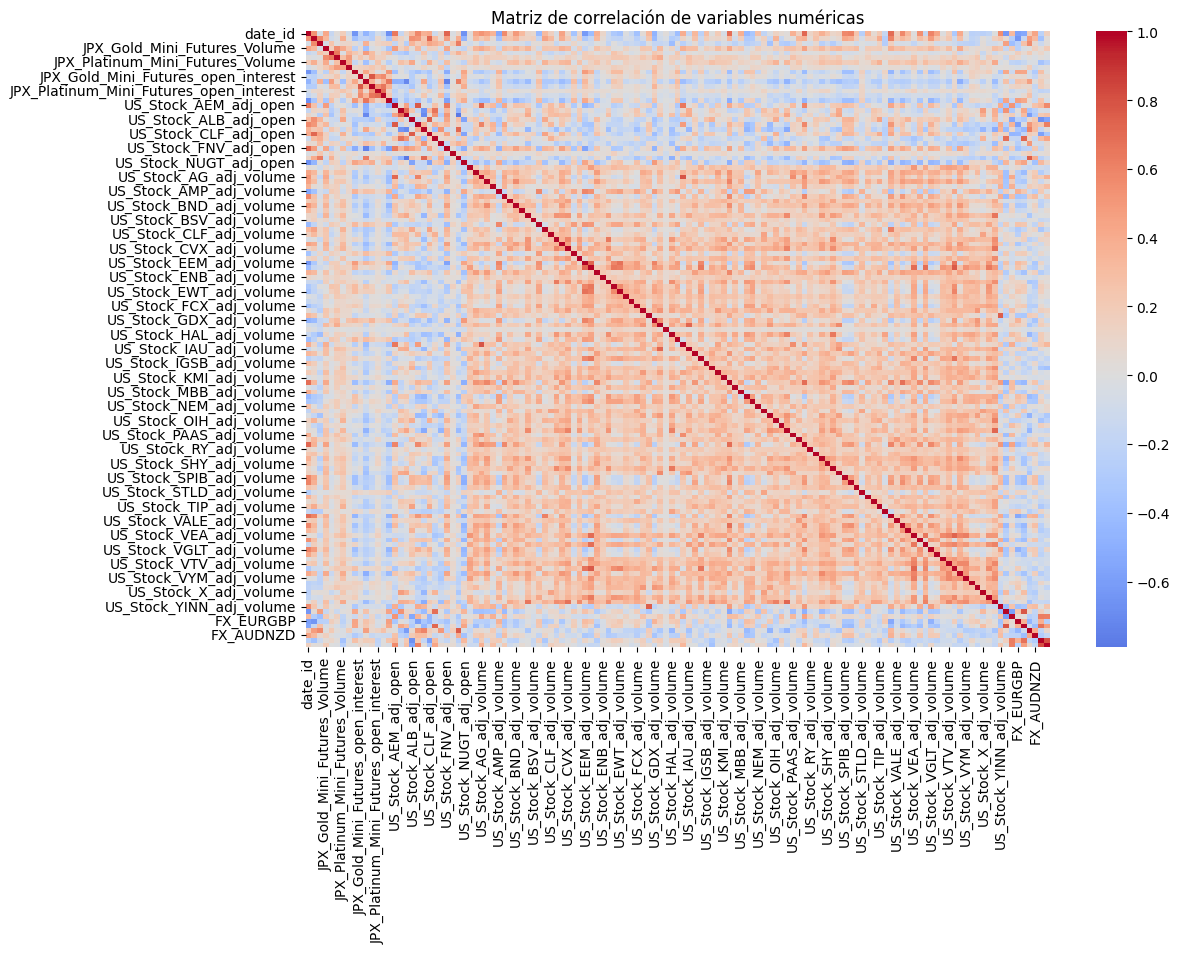

In [20]:
corr = df_reduced.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matriz de correlación de variables numéricas")
plt.show()

# Scatter ejemplo: precio vs volumen (ajusta nombres de columnas según dataset)
if "close" in df_reduced.columns and "volume" in df_reduced.columns:
    plt.figure(figsize=(8,6))
    plt.scatter(df_reduced["close"], df_reduced["volume"], alpha=0.5)
    plt.xlabel("Precio de cierre")
    plt.ylabel("Volumen")
    plt.title("Precio vs Volumen")
    plt.show()

Outliners

In [24]:
from scipy import stats

# Calcular z-scores
z_scores = np.abs(stats.zscore(df_reduced.select_dtypes(include=np.number)))

# Contar outliers (valores con |z| > 3) por columna
outliers = (z_scores > 3).sum(axis=0)

# Convertir a Series con nombres de columnas
outliers = pd.Series(outliers, index=df_reduced.select_dtypes(include=np.number).columns)

# Mostrar top 10 variables con más outliers
print("Outliers detectados por variable:\n")
print(outliers.sort_values(ascending=False).head(10))


Outliers detectados por variable:

US_Stock_AEM_adj_open                   63
US_Stock_GOLD_adj_open                  58
US_Stock_AG_adj_volume                  51
US_Stock_BCS_adj_open                   51
JPX_Gold_Rolling-Spot_Futures_Volume    51
US_Stock_VEA_adj_volume                 47
JPX_Gold_Standard_Futures_Volume        44
US_Stock_TD_adj_volume                  43
US_Stock_CLF_adj_volume                 43
US_Stock_CVX_adj_volume                 43
dtype: int64


Los outliers detectados en precios y volúmenes reflejan episodios de alta volatilidad típica del mercado financiero. Son señales relevantes que pueden aportar información sobre riesgo y movimientos extremos; por ello conviene analizarlos como posibles features predictivos en lugar de eliminarlos sin más.